In [64]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [65]:
market = pd.read_excel("C:/Users/dsouz/Desktop/ALY6020/marketing_campaign.xlsx") # importing data from excel sheet 
market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [66]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [67]:
market_new = market

In [68]:
#Checking for null values. 

null_values = market_new.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(market_new)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
Income,2400,1.071
ID,0,0.000
NumDealsPurchases,0,0.000
Z_Revenue,0,0.000
Z_CostContact,0,0.000
Complain,0,0.000
AcceptedCmp2,0,0.000
AcceptedCmp1,0,0.000
AcceptedCmp5,0,0.000
AcceptedCmp4,0,0.000


In [69]:
#Imputing null values with zero in income column
market_new['Income'].fillna(market_new['Income'].mode()[0],inplace = True)

In [70]:
#Checking if null values have been imputed with zero

null_values = market_new.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(market_new)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
ID,0,0.0
NumDealsPurchases,0,0.0
Z_Revenue,0,0.0
Z_CostContact,0,0.0
Complain,0,0.0
AcceptedCmp2,0,0.0
AcceptedCmp1,0,0.0
AcceptedCmp5,0,0.0
AcceptedCmp4,0,0.0
AcceptedCmp3,0,0.0


In [71]:
# Renaming a few columns
market_new = market_new.rename(columns={'MntFruits': 'MntFruits', 
                                        'NumStorePurchases': 'NumStorePurchases', 
                                        'NumWebVisitsMonth' : 'NumWebVisitsMonth', 
                                        'AcceptedCmp4': 'AcceptedCmp4', 
                                        'AcceptedCmp1' : 'AcceptedCmp1',
                                         'AcceptedCmp2': 'AcceptedCmp2'})


array([[<AxesSubplot:title={'center':'Response'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>],
       [<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>,
        <A

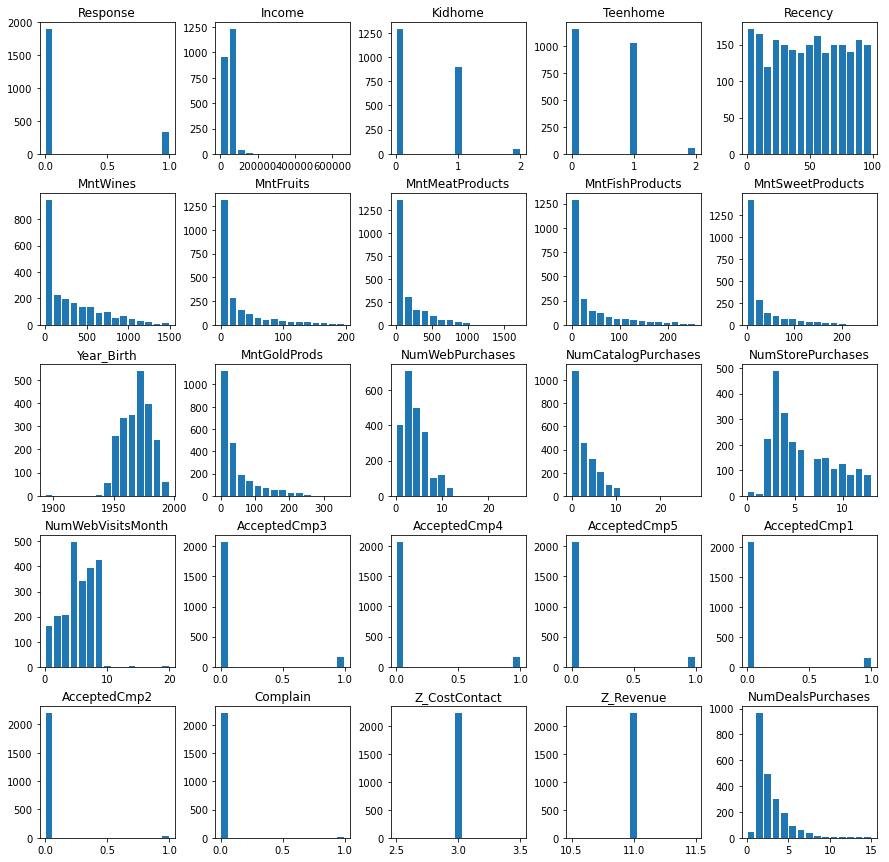

In [72]:
#Plotting a histogram
market_new[['Response', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
            'Year_Birth', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
            'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
            'AcceptedCmp2','Complain', 'Z_CostContact', 'Z_Revenue', 'NumDealsPurchases' ]].hist(bins=15, figsize= (15,15), grid=False, rwidth= 0.8)

# Splitting the data

In [78]:
#Defining the independent and dependent variables and preparing the 70/30 split
X = market_new[['Income', 'Kidhome', 'Teenhome',
                            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                            'MntSweetProducts','Year_Birth', 'MntGoldProds', 'NumWebPurchases', 
                            'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3', 
                            'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Complain', 
                            'Z_CostContact', 'Z_Revenue', 'NumDealsPurchases' ]]#.drop('Response', axis = 1)
y = market_new['Response'].values.reshape((-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [79]:
#Checking X
X

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Year_Birth,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,NumDealsPurchases
0,58138.0,0,0,58,635,88,546,172,88,1957,...,7,0,0,0,0,0,0,3,11,3
1,46344.0,1,1,38,11,1,6,2,1,1954,...,5,0,0,0,0,0,0,3,11,2
2,71613.0,0,0,26,426,49,127,111,21,1965,...,4,0,0,0,0,0,0,3,11,1
3,26646.0,1,0,26,11,4,20,10,3,1984,...,6,0,0,0,0,0,0,3,11,2
4,58293.0,1,0,94,173,43,118,46,27,1981,...,5,0,0,0,0,0,0,3,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,1967,...,5,0,0,0,0,0,0,3,11,2
2236,64014.0,2,1,56,406,0,30,0,0,1946,...,7,0,0,0,1,0,0,3,11,7
2237,56981.0,0,0,91,908,48,217,32,12,1981,...,6,0,1,0,0,0,0,3,11,1
2238,69245.0,0,1,8,428,30,214,80,30,1956,...,3,0,0,0,0,0,0,3,11,2


In [80]:
#Checking y
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [81]:
# Significance test for the numerical columns
X_new = sm.add_constant(X)
model = sm.Logit(y, X_new)
fitmodel = model.fit()
print(fitmodel.summary())

         Current function value: 0.292188
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2217
Method:                           MLE   Df Model:                           22
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  0.3062
Time:                        22:15:51   Log-Likelihood:                -654.50
converged:                      False   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                3.975e-108
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Income              -1.914e-07   3.77e-06     -0.051      0.960   -7.58e-06     7.2e-06
Kidhome                 0.0718      0.

# Logistic Regression

In [31]:
logistic_model=LogisticRegression(solver='liblinear')

In [32]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(logistic_model.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

87.05357142857143
83.77976190476191
[[547  17]
 [ 92  16]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       564
           1       0.48      0.15      0.23       108

    accuracy                           0.84       672
   macro avg       0.67      0.56      0.57       672
weighted avg       0.80      0.84      0.80       672



<AxesSubplot:title={'center':'Feature Importance'}>

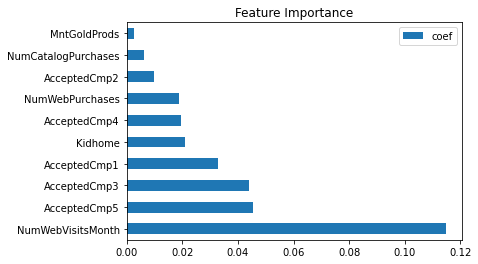

In [87]:
#Feature Importance for logistic Regression
logistic_model.fit(X_train,y_train)

importance = logistic_model.coef_[0]

test = pd.DataFrame(importance,
                     X.columns,
                     columns=['coef']).sort_values(by='coef', ascending=False)


test.nlargest(10, ['coef']).plot(kind='barh',title = 'Feature Importance')




# SVM

In [88]:
svm = LinearSVC(random_state=0, tol=1e-5)

In [89]:
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(svm.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

85.58673469387756
83.77976190476191
[[563   1]
 [108   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       564
           1       0.00      0.00      0.00       108

    accuracy                           0.84       672
   macro avg       0.42      0.50      0.46       672
weighted avg       0.70      0.84      0.77       672



<AxesSubplot:title={'center':'Feature Importance'}>

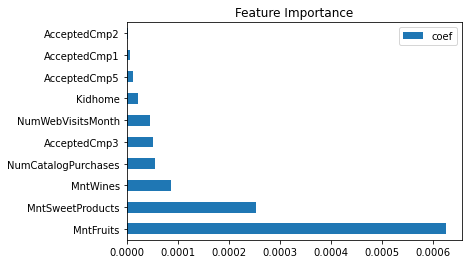

In [90]:
#Feature importance for SVM
svm.fit(X_train,y_train)

importance = svm.coef_[0]

test = pd.DataFrame(importance,
                     X.columns,
                     columns=['coef']).sort_values(by='coef', ascending=False)


test.nlargest(10, ['coef']).plot(kind='barh',title = 'Feature Importance')


